# Telco Customer Churn Analysis

## Imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Importing the csv file

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Understanding the dataset

In [11]:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Demographic:

   a.	Which 2 demographics proved to be the most popular with the telco brand?
        
   b. If the marketing team wanted to increase customer retention, to whom should they focus their advertisements on?

In [12]:
churn_no = df[df['Churn'] == 'No']
churn_yes = df[df['Churn'] == 'Yes']

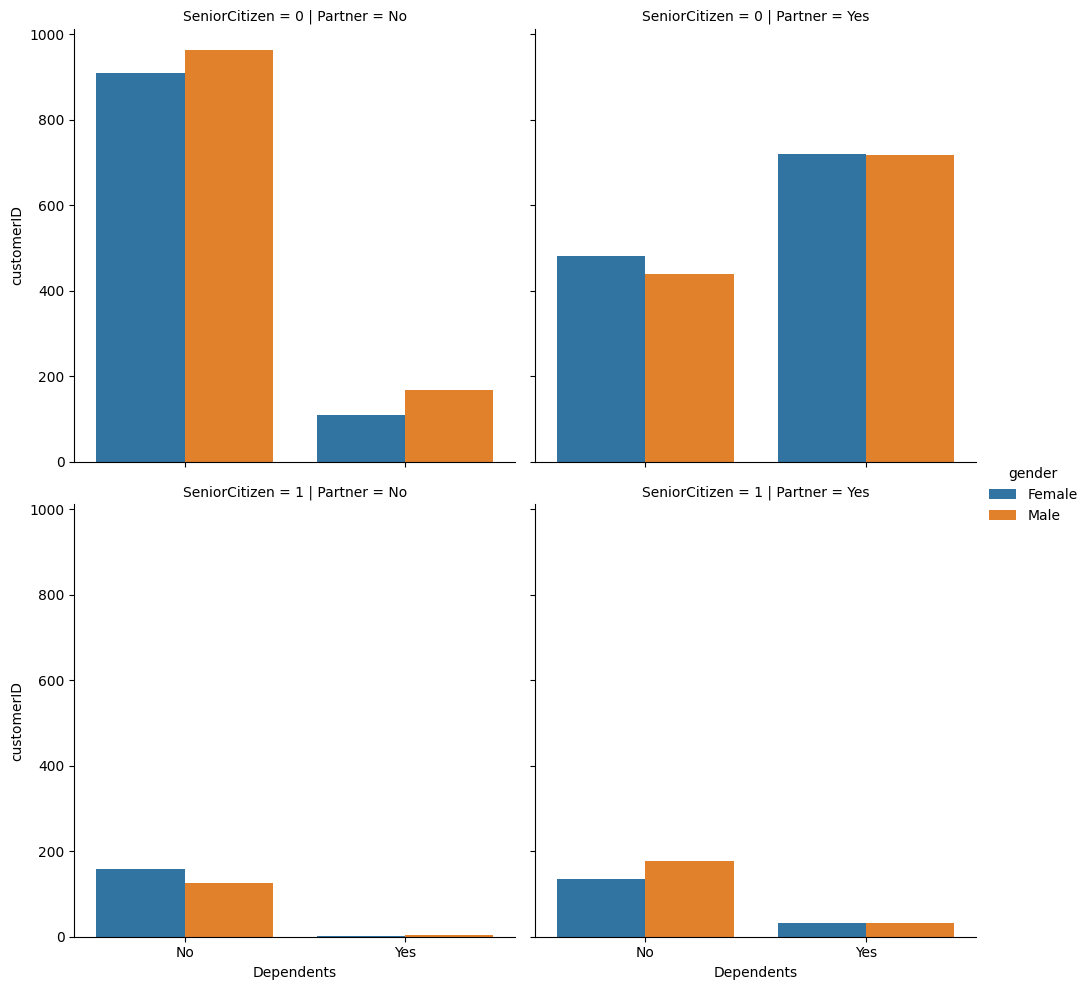

In [13]:
demo_no = churn_no.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents'])['customerID'].count().reset_index()
sns.catplot(data = demo_no, x = 'Dependents', y = 'customerID', row = 'SeniorCitizen', col = 'Partner',  hue = 'gender', kind = 'bar')

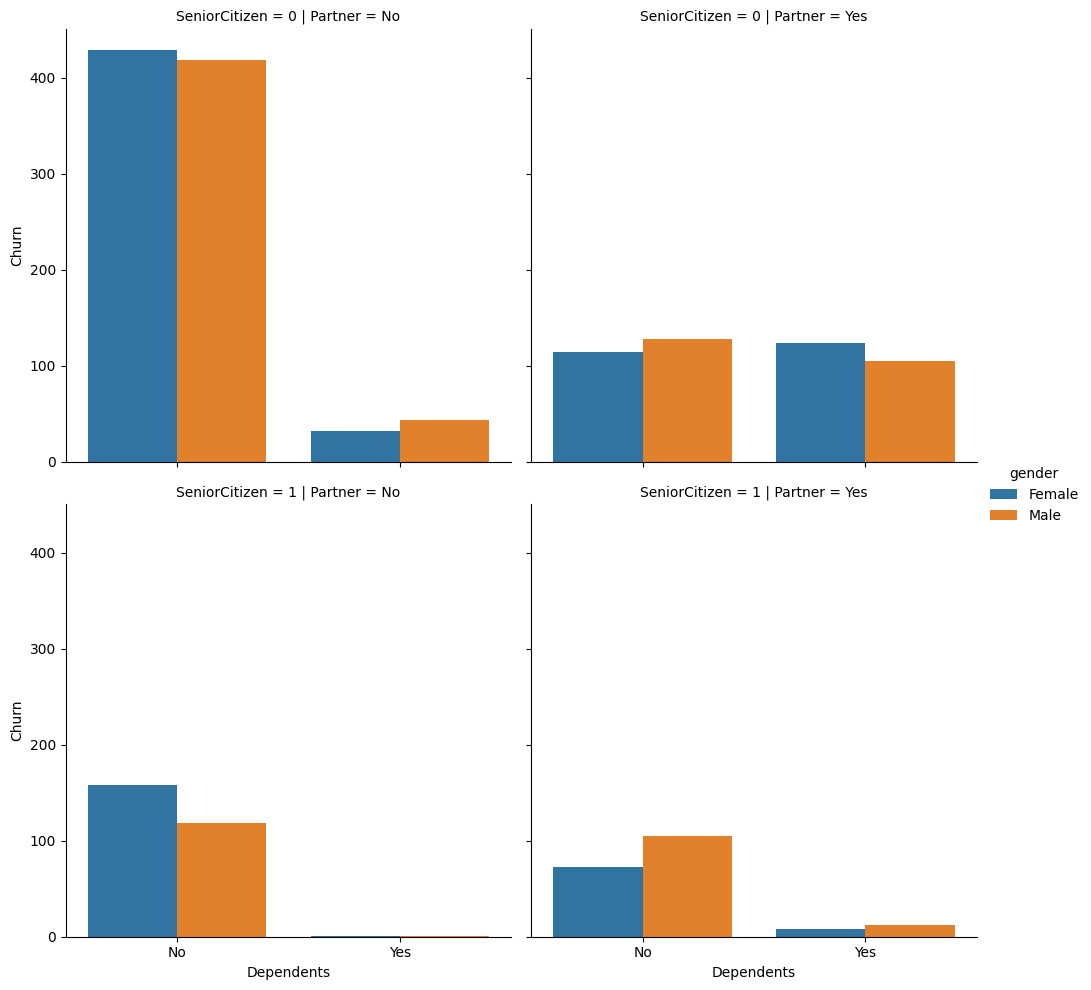

In [14]:
demo_yes = churn_yes.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents'])['Churn'].count().reset_index()
sns.catplot(data = demo_yes, x = 'Dependents', y = 'Churn', row = 'SeniorCitizen', col = 'Partner',  hue = 'gender', kind = 'bar')

Both single, young to mid aged, men and women without dependents are the most popular with the telco brand. Yet, they are the majority of those churning. Therefore, the telco brand should target these two demographics in their marketing adverts.

## Services:

a. Which 3 services are contributing to a higher monthly charge and resulting to
customers churning? (Use visualizations in explaining your analysis)

b. If the telco was to offer Phone as a standalone service, which type of contract
would encourage customer retention?


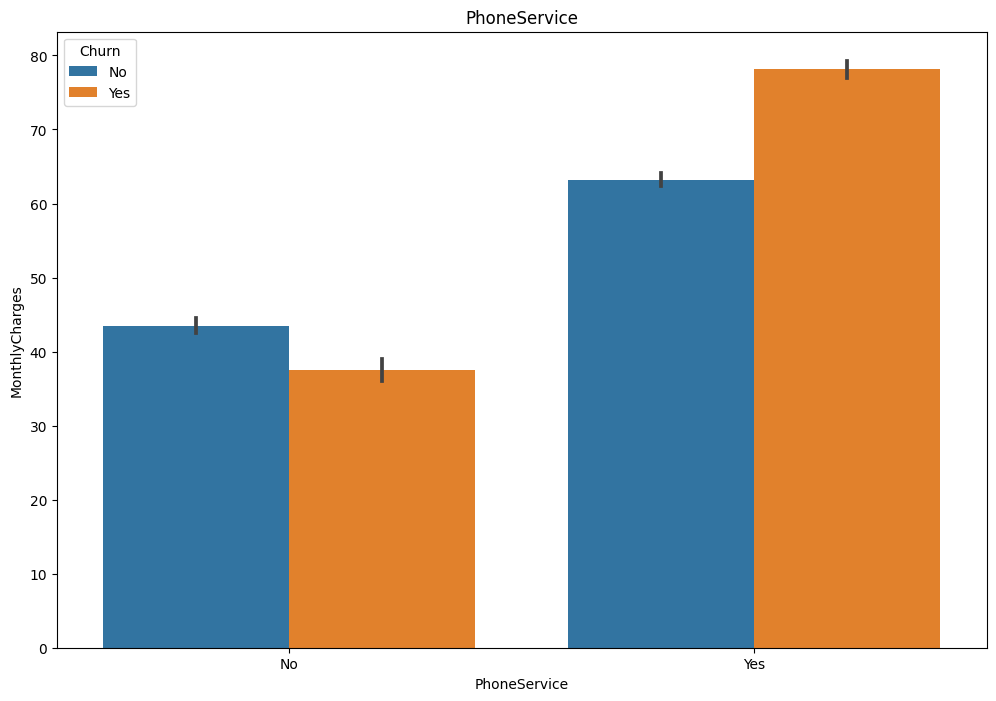

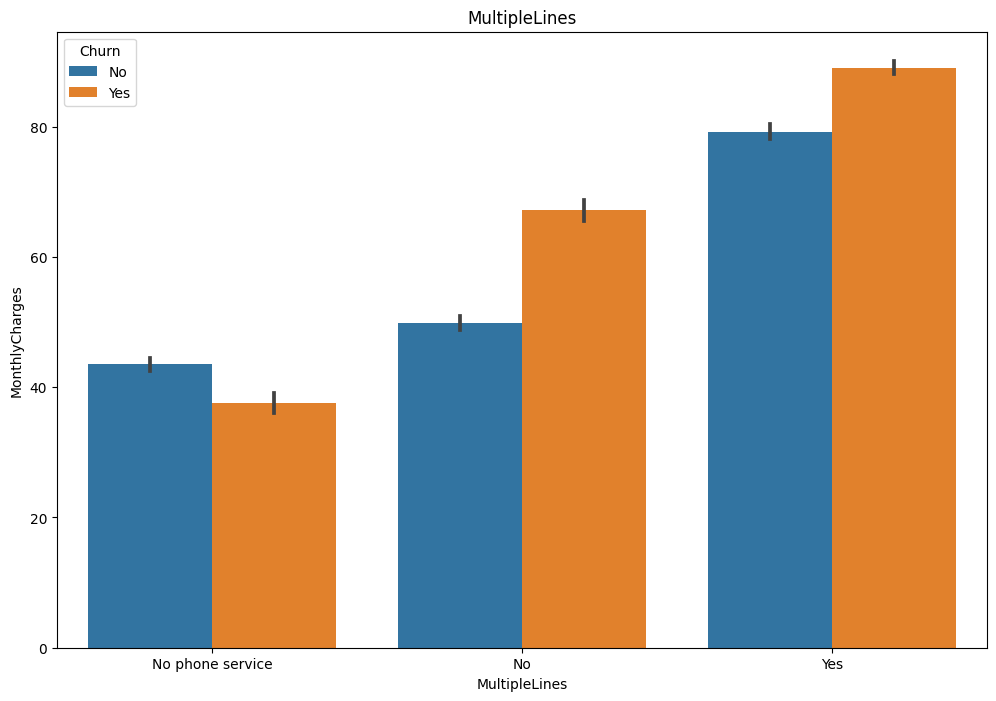

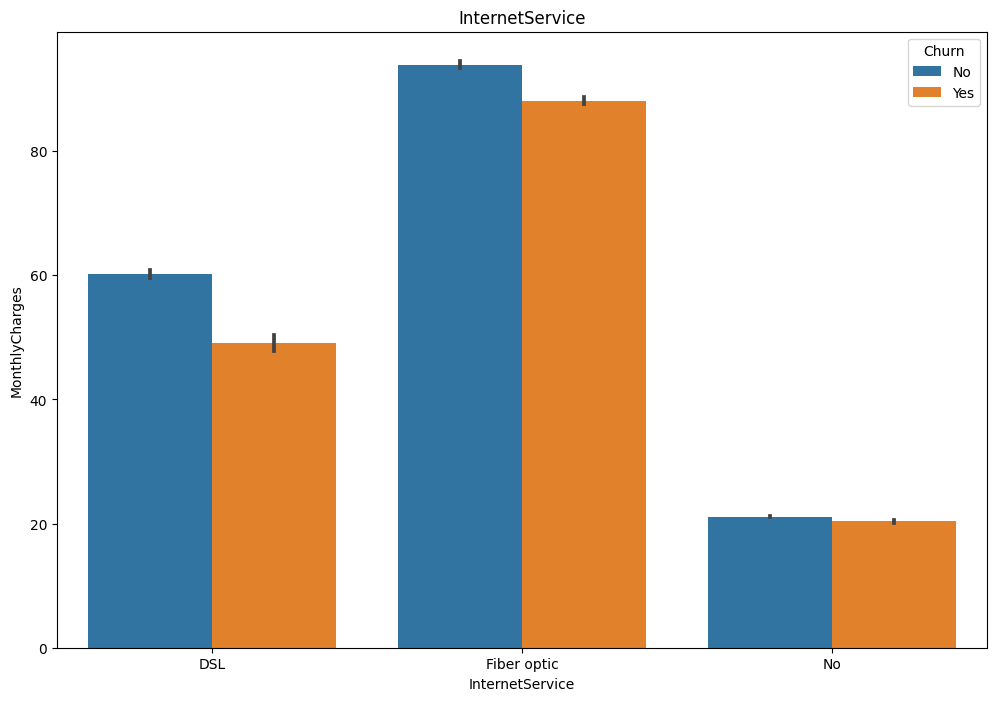

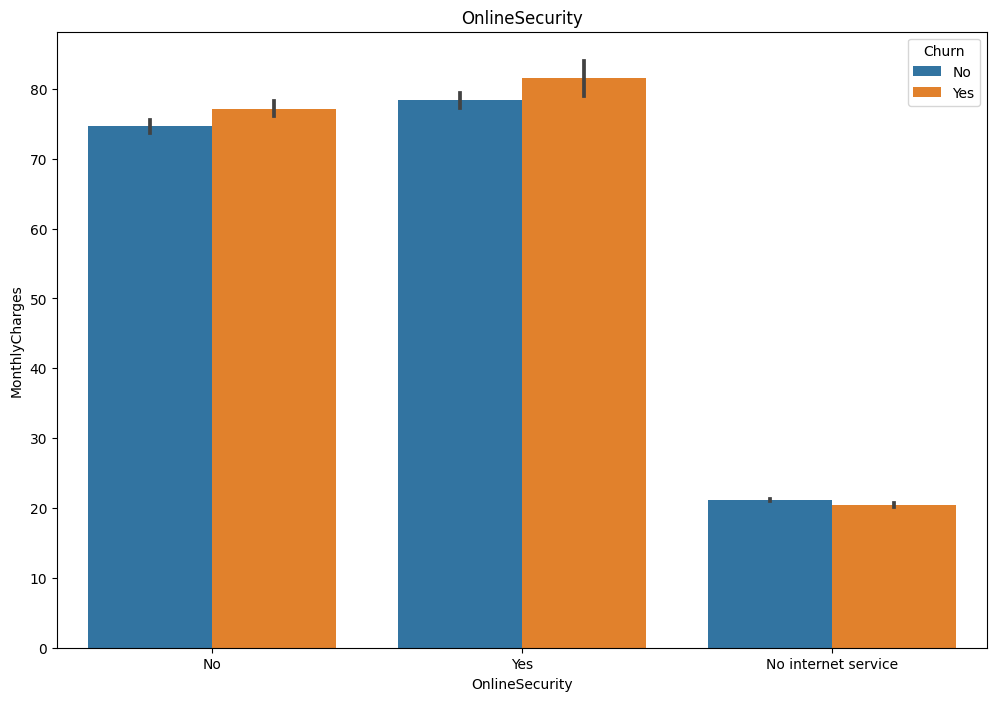

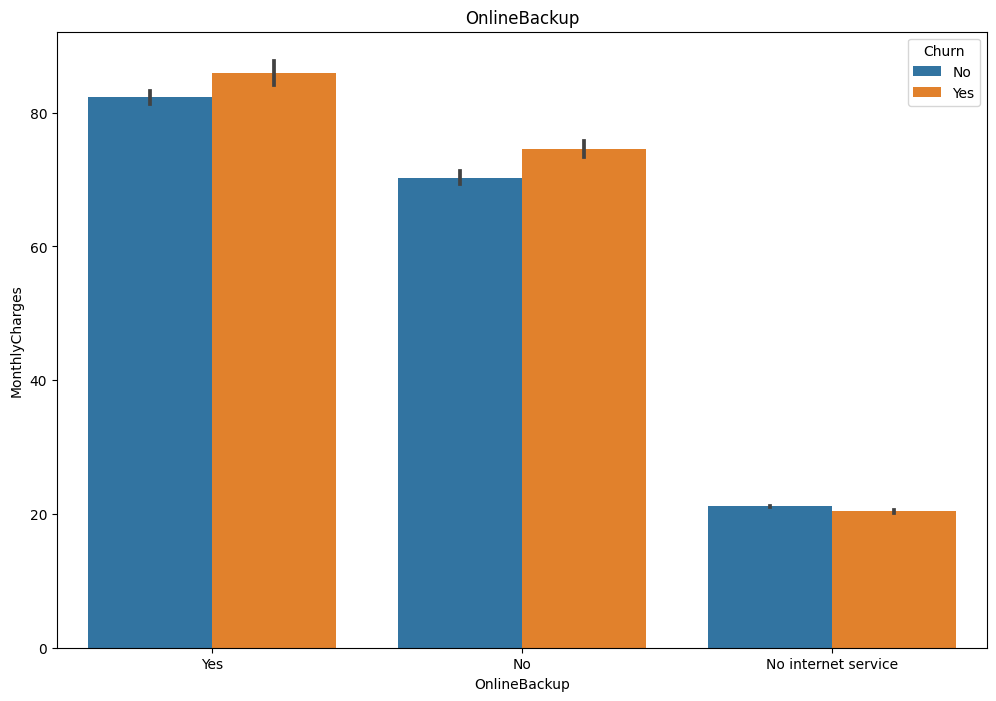

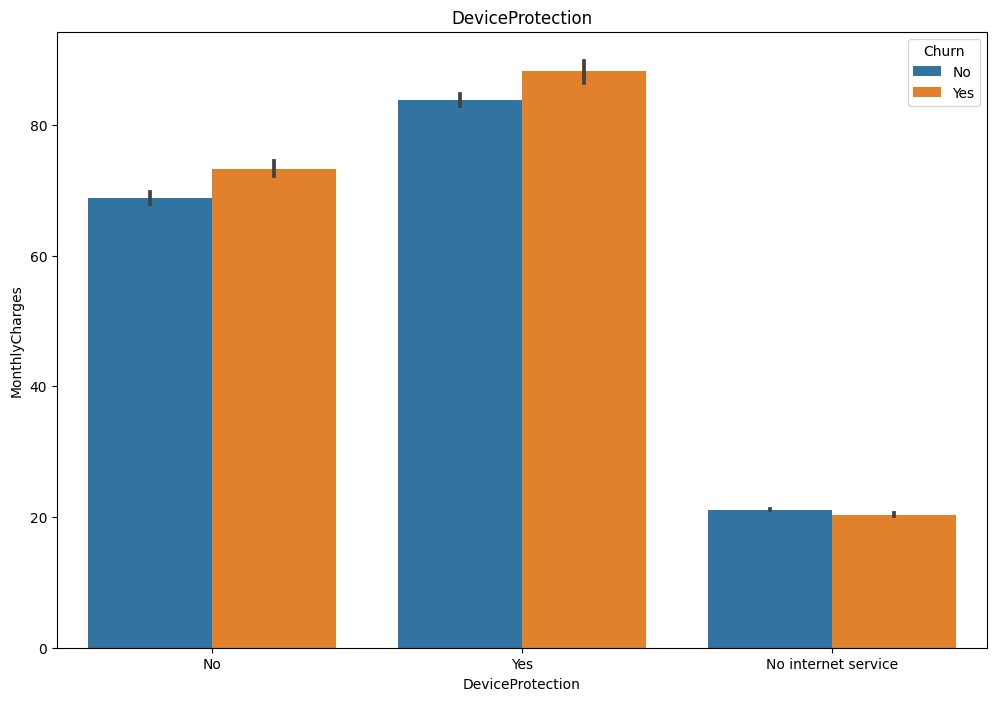

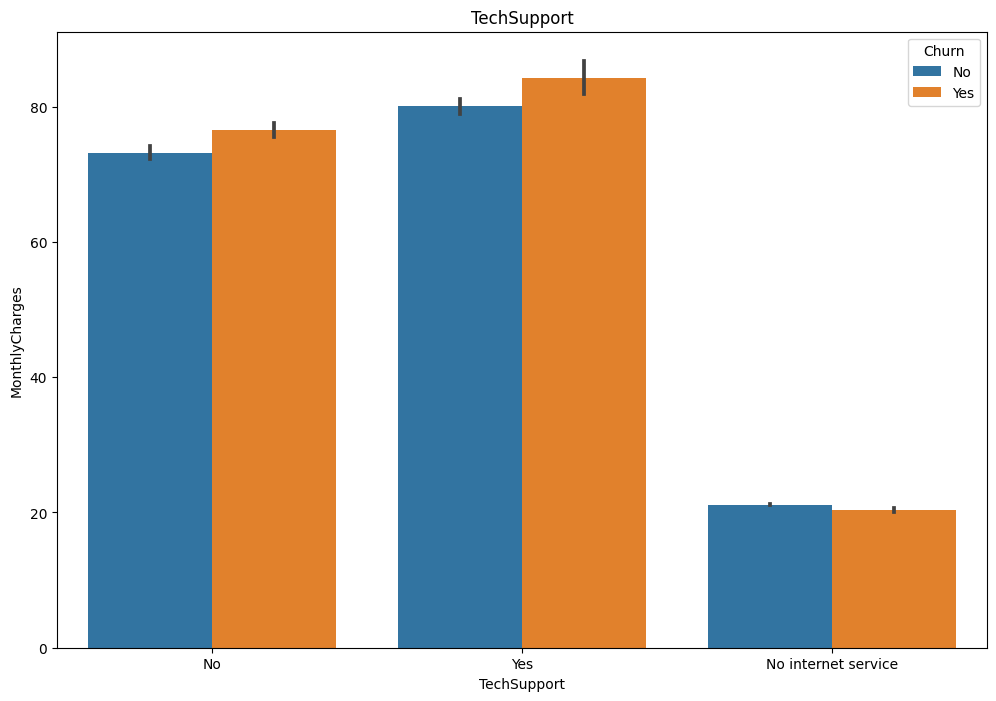

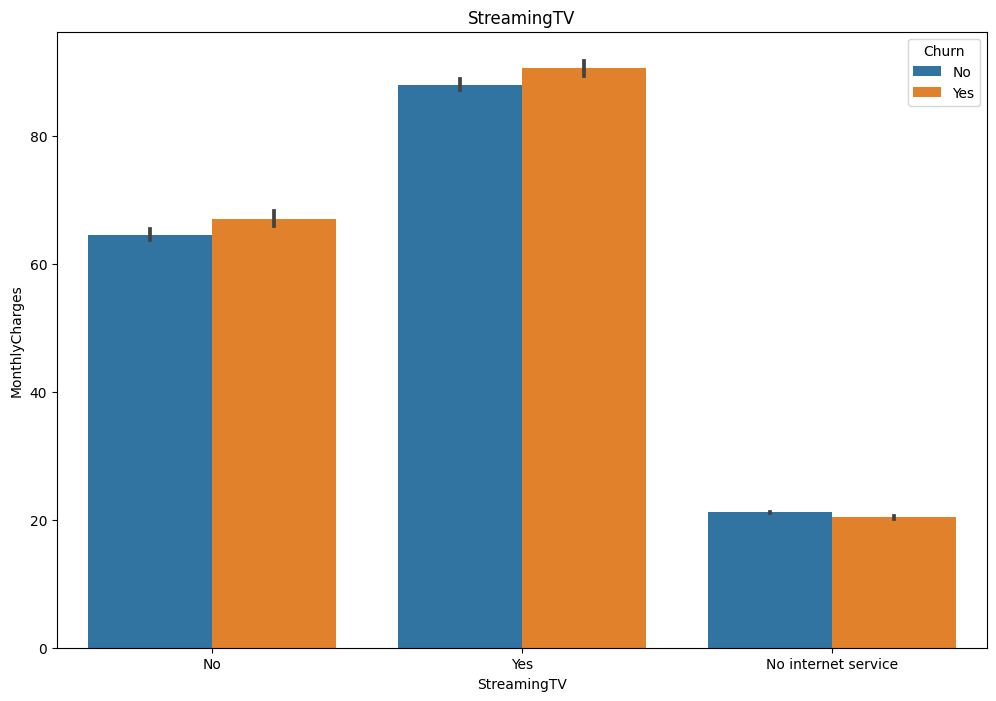

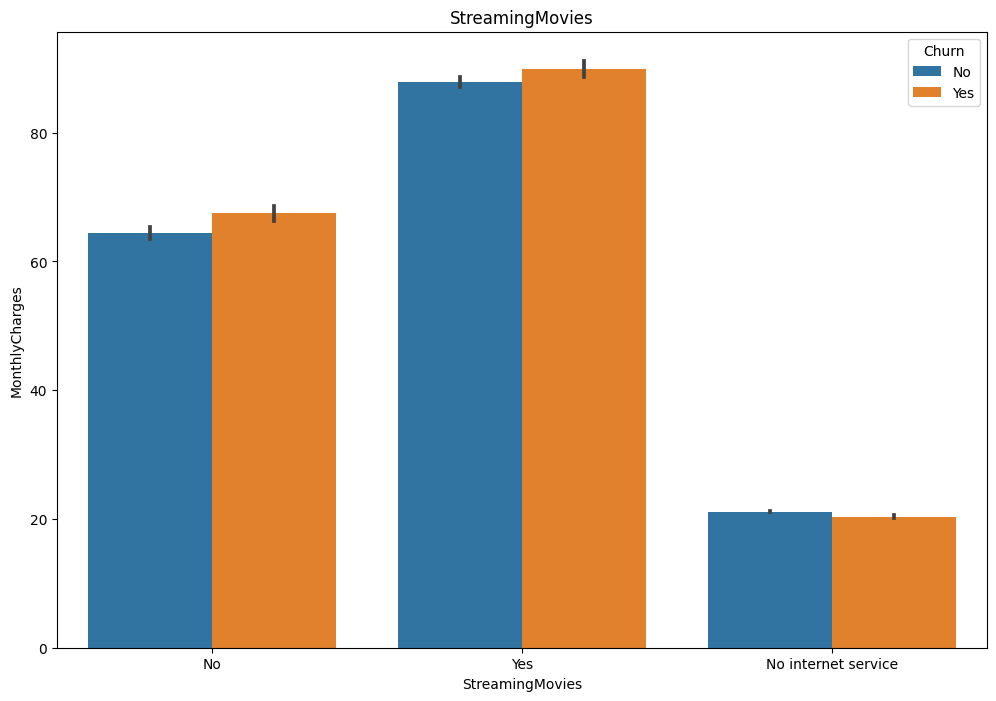

In [15]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


for service in services:
    plt.figure(figsize = (12, 8))
    sns.barplot(x = service, y = 'MonthlyCharges', data = df, hue = 'Churn')
    plt.title(service)
    plt.show()

In [16]:
phone_service = df[df['PhoneService'] == 'Yes']

<Axes: xlabel='Contract', ylabel='count'>

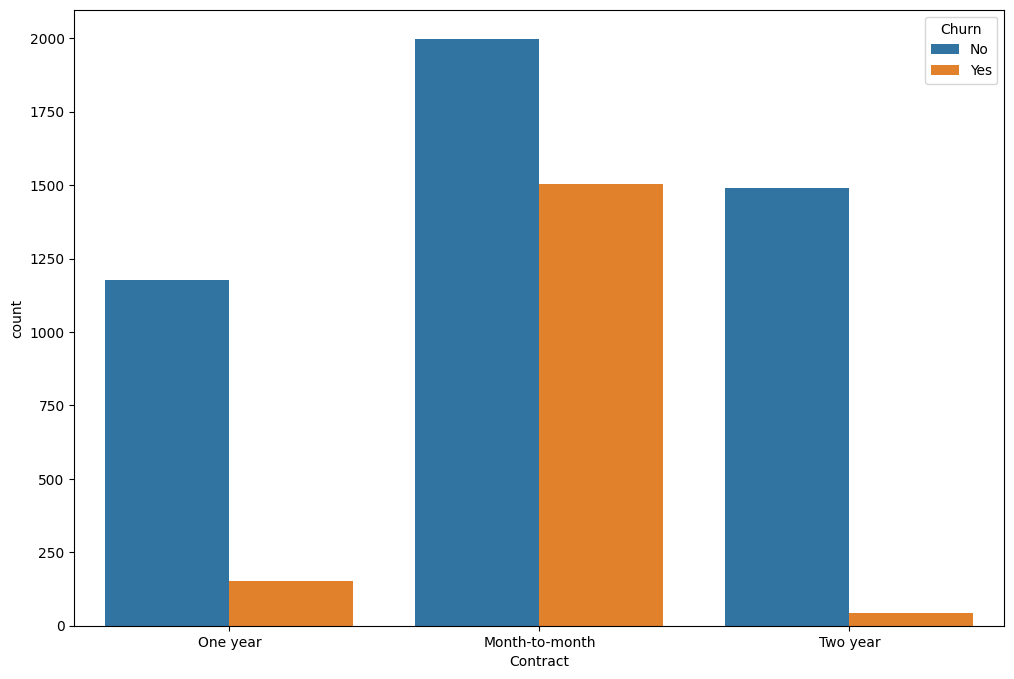

In [17]:
plt.figure(figsize = (12, 8))
sns.countplot(data = phone_service, x = 'Contract', hue = 'Churn')

## Payment:

a.	If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
    
        i.	Basic
        
        ii.	Plus
      
        iii. Premium

In [18]:
df_anomaly['Info_Diff'].isin(df_normal['Info_Diff'])

NameError: name 'df_anomaly' is not defined